#### Real Estate Price prediction

##### Problem Statement:  
The problem at hand is to develop a predictive model that can accurately estimate the prices of houses in Bangalore, India. With the increasing demand for housing and the rapidly evolving real estate market, it has become essential for potential buyers, sellers, and investors to have an accurate understanding of property values. The availability of a comprehensive dataset containing various attributes of houses in Bangalore provides an excellent opportunity to address this challenge.

##### About the Dataset:
The dataset provided contains information on house prices in Bengaluru (Bangalore), India. It includes several attributes such as the area type, availability, location, size, society, total square footage, number of bathrooms, number of balconies, and the corresponding price of the houses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Lets explore the data

In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
# lets check the value counts of each column to have a better idea about the data

for i in df.columns:
    print(df[i].value_counts())
    print('-'*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
------------------------------
2 

In [10]:
# From the above, it can be seen that:

# In Whitefield & Sarjapur  Road location, maximum numbers of houses are available
# Maximum numbers of houses/flats included in this dataset are of 2 BHK
# Maximum numbers of houses/flats are of 1200 sqfeet area
# Houses with 2 bathrooms and 2 balcony are most common
# The price of most of the houses/flat ranges between 55 to 75 lakhs.

In [11]:
# Also from the above, it can be seen that there are some outliers in the dataset. I shall remove it on later stage before building the model

Checking and treating Null Values

In [12]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
# After exploring the dataset, I found that the column area-type, society ,availabilty and balcony is not much contributing to the house price. So lets drop those column

In [14]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [15]:
df.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [16]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
# Treating Null Values

In [18]:
# For location, only 1 value is missing. We may either drop that row or replace it with the most common location i.e., Whitefield
# Lets fillthe null value

df['location']=df['location'].fillna('Whitefield')

In [19]:
df['location'].isna().sum()

0

In [20]:
# For size column, there are 16 missing values. As most of the houses are of 2 BHK so lets fill the null values with that

df['size']=df['size'].fillna('2 BHK')

In [21]:
df['size'].isna().sum()

0

In [22]:
# For the bathroom column, there are 73 missing values. Lets fill these value with median value i.e., 2

df['bath']=df['bath'].fillna(df['bath'].median())

In [23]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
# All the missing values were treated and now there are no missing values in the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [26]:
# From above, it can be seen that bathroom column is in float type which can be converted to int to save memory usage.

# Also for price column, most of the values are in integer.

# So, lets convert both the bathroom and price column from float to int

df['bath']=df['bath'].astype(int)
df['price']=df['price'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    13320 non-null  object
 1   size        13320 non-null  object
 2   total_sqft  13320 non-null  object
 3   bath        13320 non-null  int32 
 4   price       13320 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 416.4+ KB


In [28]:
# From above it can be seen that, earlier the memory usage was 520.4+ KB but after after converting bathroom and price column to integer, the memory usage reduced to 416.4+ KB.

In [29]:
#Lets see the size column once more

df['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [30]:
# From above, it can be seen that somewhere there is BHK and somewhere there is bedroom written .
# But since we need only the bedroom umber, so I shll split the size column and extract only the number

In [31]:
df['size']=df['size'].str.split().str.get(0).astype(int)

In [32]:
df['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int32

In [33]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2,39
1,Chikka Tirupathi,4,2600,5,120
2,Uttarahalli,3,1440,2,62
3,Lingadheeranahalli,3,1521,3,95
4,Kothanur,2,1200,2,51


In [34]:
# Lets see the total_sqft column

df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [35]:
# From above, we can see that, there are some values in range for e.g.,1133-1384, hence we need to fix that

# lets create a function which will first split the data on "-" and return the mean of the two numbers

def convertRange(x):
    temp= x.split("-")
    if temp == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [37]:
df['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [38]:
df['price_per_sqft']=df['price']*100000 /df['total_sqft']

In [39]:
df['price_per_sqft']

0         3693.181818
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   size            13320 non-null  int32  
 2   total_sqft      13073 non-null  float64
 3   bath            13320 non-null  int32  
 4   price           13320 non-null  int32  
 5   price_per_sqft  13073 non-null  float64
dtypes: float64(2), int32(3), object(1)
memory usage: 468.4+ KB


In [41]:
# Now, lets work with location column

df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [42]:
df['location']=df['location'].apply(lambda x:x.strip())

In [43]:
location_count=df['location'].value_counts()
location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [44]:
# It can be seen that earlier there were 1305 unique location, after striping no. of unique locations become 1294.

In [45]:
# Since there are so many unique values, we cannot do one hot encoding here as it will create 1294 additional columns

In [46]:
# So lets replace all the location that have value count less than 20 as "other" location

location_count_less_than_20= location_count[location_count <=20]
location_count_less_than_20

Poorna Pragna Layout              20
Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
Kalyan nagar                      19
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1150, dtype: int64

In [47]:
# There are 1053 loaction which occured less than or equal to 10 timesin the dataset. So lets replace those record as other

df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less_than_20 else x)

In [48]:
df['location'].value_counts()

other                 4288
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Domlur                  22
Hoskote                 22
Binny Pete              21
Basaveshwara Nagar      21
Ulsoor                  21
Name: location, Length: 145, dtype: int64

In [49]:
# From 1305 records, the no. of unique location reduced to 145 only.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   size            13320 non-null  int32  
 2   total_sqft      13073 non-null  float64
 3   bath            13320 non-null  int32  
 4   price           13320 non-null  int32  
 5   price_per_sqft  13073 non-null  float64
dtypes: float64(2), int32(3), object(1)
memory usage: 468.4+ KB


In [51]:
# All the features now has been converted to numerical

In [52]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2,39,3693.181818
1,other,4,2600.0,5,120,4615.384615
2,Uttarahalli,3,1440.0,2,62,4305.555556
3,Lingadheeranahalli,3,1521.0,3,95,6245.890861
4,Kothanur,2,1200.0,2,51,4250.000000


<AxesSubplot:>

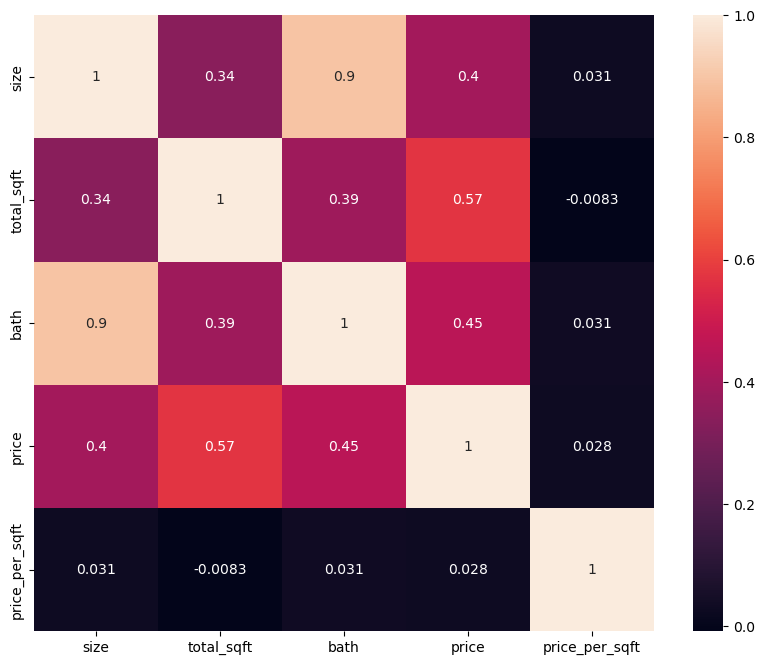

In [53]:
# Now visulize our data

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


Detecting And Removing Outliers

In [54]:
# Lets check which columns has outliers

df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13320.000000,13073.000000,13320.000000,13320.000000,1.307300e+04
mean,2.802778,1554.942029,2.688814,112.462538,7.940828e+03
std,1.294496,1238.458773,1.338754,149.012102,1.072442e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.255319e+03
50%,3.000000,1275.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1670.000000,3.000000,120.000000,7.335542e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [55]:
# From above, it can be seen that for total_sqft column min sqft is 1 which is surely an outlier. So lets filter the data where total_sqft is atleast 300

(df['total_sqft']/df['size']).describe()


count    13073.000000
mean       573.254923
std        389.887823
min          0.250000
25%        472.000000
50%        551.000000
75%        625.000000
max      26136.000000
dtype: float64

In [56]:
# Lets filter our data where total_sqft/size of the house is greater than or equal to 300
df=df[(df['total_sqft']/df['size']) >=300]
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,2.651472,1590.166773,2.561441,111.340417,6313.256792
std,0.973754,1261.827604,1.072551,152.799538,4191.833785
min,1.000000,300.000000,1.000000,8.000000,267.829813
25%,2.000000,1118.000000,2.000000,49.000000,4197.761194
50%,3.000000,1300.000000,2.000000,70.000000,5291.828794
75%,3.000000,1700.000000,3.000000,115.000000,6933.333333
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


In [57]:
df.shape

(12329, 6)

In [58]:
df['price_per_sqft'].describe()

count     12329.000000
mean       6313.256792
std        4191.833785
min         267.829813
25%        4197.761194
50%        5291.828794
75%        6933.333333
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
# From above, it can be clearly seen that all the columns has outliers, so lets detect and remove them

Text(0.5, 1.0, 'Boxplot of price')

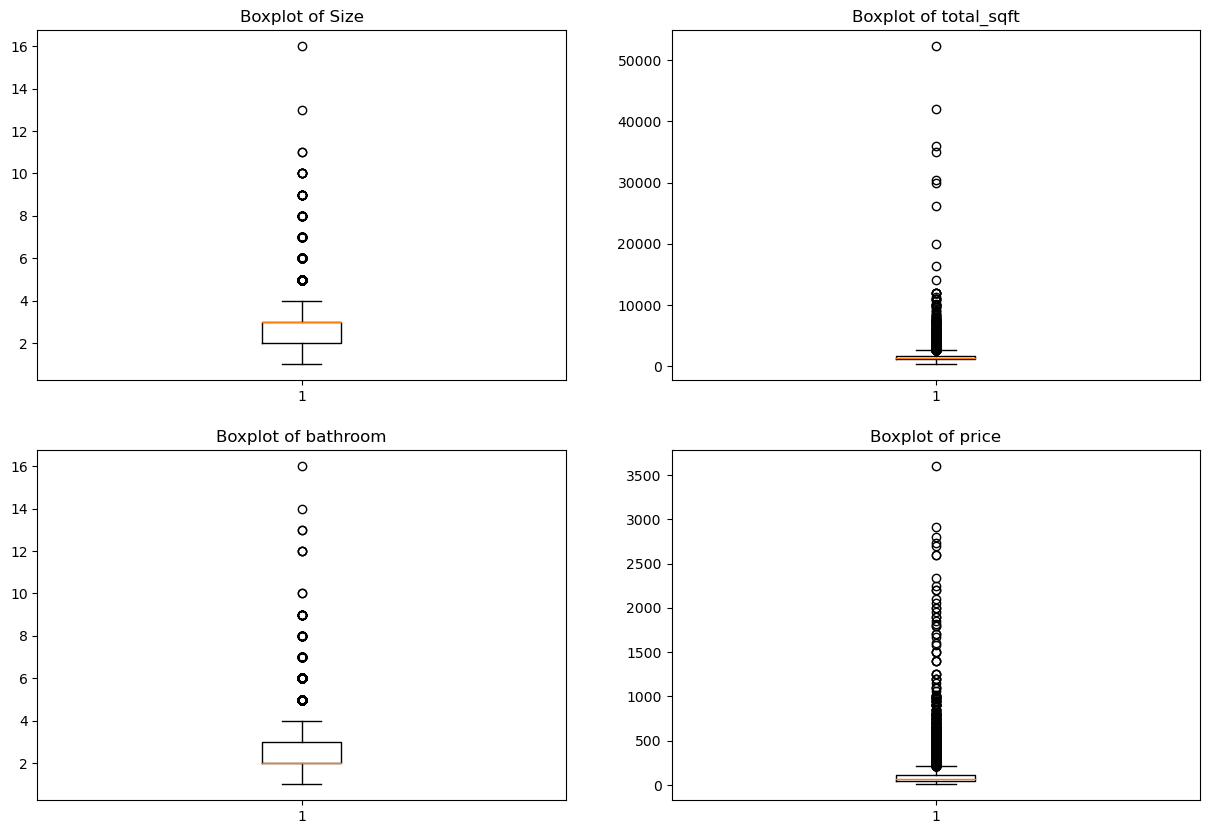

In [60]:
# Also lets visualize the outliers

fig, axes=plt.subplots(2,2,figsize=(15,10))

axes[0,0].boxplot(df['size'])
axes[0,0].set_title('Boxplot of Size')

axes[0,1].boxplot(df['total_sqft'])
axes[0,1].set_title('Boxplot of total_sqft')

axes[1,0].boxplot(df['bath'])
axes[1,0].set_title('Boxplot of bathroom')

axes[1,1].boxplot(df['price'])
axes[1,1].set_title('Boxplot of price')


Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [61]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
print(df.shape)

(10337, 6)


In [62]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000
mean,2.576183,1500.725832,2.475573,89.263519,5601.719480
std,0.898607,870.278722,0.976310,79.208548,2121.350859
min,1.000000,300.000000,1.000000,10.000000,1379.310345
25%,2.000000,1107.000000,2.000000,49.000000,4213.694507
50%,2.000000,1282.000000,2.000000,67.000000,5165.165165
75%,3.000000,1650.000000,3.000000,100.000000,6430.155211
max,16.000000,30400.000000,16.000000,2200.000000,21875.000000


In [63]:
# Lets also remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

def remove_bhk_outliers(data):
    exclude_indices = np.array([])                  # It will store the indices that we do not require
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {                                      # bhk_stats is storing mean,std and count for each bhk
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:                 # counting the mean only for those BHK whose count is greater than 5
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)  # storing all the data that we donot require, we want bhk data whose price per sqft is greater than the mean of its predeceding BHK
    return df.drop(exclude_indices,axis='index')     # keeping the desired data by dropping the excluded one.
df = remove_bhk_outliers(df)
df.shape

(6896, 6)

In [64]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000
mean,2.508701,1498.199318,2.464762,99.538283,6191.328483
std,0.920437,854.658715,1.014145,86.845051,2248.505237
min,1.000000,300.000000,1.000000,10.000000,1495.513460
25%,2.000000,1100.000000,2.000000,52.000000,4770.904825
50%,2.000000,1268.500000,2.000000,75.000000,5818.181818
75%,3.000000,1691.000000,3.000000,115.000000,7000.833730
max,16.000000,30000.000000,16.000000,2200.000000,21875.000000


In [66]:
df['location'], labels = pd.factorize(df['location'])

# Mapping encoded values back to original labels
encoded_values = [0,1, 2,3,142,143,144]
mapped_locations = labels[encoded_values]

print("Encoded Values: ", encoded_values)
print("Mapped Locations: ", mapped_locations)

Encoded Values:  [0, 1, 2, 3, 142, 143, 144]
Mapped Locations:  Index(['1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       '6th Phase JP Nagar', 'Yelahanka New Town', 'Yeshwanthpur', 'other'],
      dtype='object')


In [67]:
df = df.drop(['price_per_sqft'],axis='columns')


In [68]:
df.describe()

,location,size,total_sqft,bath,price
count,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000
mean,93.513921,2.508701,1498.199318,2.464762,99.538283
std,46.453306,0.920437,854.658715,1.014145,86.845051
min,0.000000,1.000000,300.000000,1.000000,10.000000
25%,55.000000,2.000000,1100.000000,2.000000,52.000000
50%,104.000000,2.000000,1268.500000,2.000000,75.000000
75%,142.000000,3.000000,1691.000000,3.000000,115.000000
max,144.000000,16.000000,30000.000000,16.000000,2200.000000


In [69]:
# From above, it can be seen that, the outliers were removed. 

In [70]:
df.shape

(6896, 5)

In [71]:
df.sample(15)

,location,size,total_sqft,bath,price
2594,60,2,1295.0,2,64
7844,144,3,1570.0,3,115
2601,60,2,1255.0,2,52
4903,116,2,1200.0,2,150
4025,94,2,1095.0,2,55
414,13,2,890.0,2,27
7310,144,3,1525.0,2,122
4556,109,4,3496.0,4,262
4461,106,2,1030.0,2,50
5866,134,2,1180.0,2,100


#### Building and Training Regression Model

In [72]:
X = df.iloc[:,0:4]
X.head(3)


,location,size,total_sqft,bath
1,0,3,1875.0,3
2,0,5,1500.0,5
3,0,3,2065.0,4


In [73]:
y=df['price']
y

1        167
2         85
3        210
5        225
6        100
        ... 
10329     26
10332    140
10333     60
10335    134
10336    400
Name: price, Length: 6896, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

##### Feature Engineering

In [75]:
# Lets scale the independent variable using StandardScaler before fitting it into the model

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
ss=StandardScaler()

In [78]:
X_scaled=ss.fit_transform(X)

In [79]:
X_scaled

array([[-2.01321953e+00,  5.33805942e-01,  4.40910504e-01,
         5.27810819e-01],
       [-2.01321953e+00,  2.70684359e+00,  2.10705407e-03,
         2.50005867e+00],
       [-2.01321953e+00,  5.33805942e-01,  6.63237585e-01,
         1.51393474e+00],
       ...,
       [ 1.08689229e+00, -5.52712883e-01, -5.65412074e-01,
        -4.58313106e-01],
       [ 1.08689229e+00,  5.33805942e-01,  3.59000527e-01,
         5.27810819e-01],
       [ 1.08689229e+00,  1.62032477e+00,  2.45940637e+00,
         2.50005867e+00]])

In [80]:
pd.DataFrame(X_scaled)

,0,1,2,3
0,-2.013220,0.533806,0.440911,0.527811
1,-2.013220,2.706844,0.002107,2.500059
2,-2.013220,0.533806,0.663238,1.513935
3,-2.013220,0.533806,0.656217,0.527811
4,-2.013220,-0.552713,-0.121928,-0.458313
...,...,...,...,...
6891,1.086892,-1.639232,-0.802951,-1.444437
6892,1.086892,-0.552713,-0.348936,-0.458313
6893,1.086892,-0.552713,-0.565412,-0.458313
6894,1.086892,0.533806,0.359001,0.527811


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5516, 4)
(1380, 4)
(5516,)
(1380,)


In [83]:
# Applying LinearRegression

lr=LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred=lr.predict(X_test)

In [86]:
y_test

3777     77
5462     72
2860     50
3265     70
3430     39
       ... 
4453     46
6101     65
1364     41
2865     68
2434    120
Name: price, Length: 1380, dtype: int32

In [87]:
print("Mean Absolute error for LinearRegression model is: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared error for LinearRegression model is: ", mean_squared_error(y_test,y_pred))
print("R2 score for LinearRegression model is: ", r2_score(y_test,y_pred))

Mean Absolute error for LinearRegression model is:  20.604156190322332
Mean Squared error for LinearRegression model is:  1104.264206394144
R2 score for LinearRegression model is:  0.8026680358537926


In [88]:
# Appying Lasso

lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [89]:
y_pred_lasso=lasso.predict(X_test)

In [90]:
y_pred_lasso

array([ 84.85214316,  74.31194427,  53.64363481, ...,  51.90611085,
        68.62523152, 108.55584687])

In [91]:
y_test

3777     77
5462     72
2860     50
3265     70
3430     39
       ... 
4453     46
6101     65
1364     41
2865     68
2434    120
Name: price, Length: 1380, dtype: int32

In [92]:
print("R2 score of Lasso model is: ", r2_score(y_test,y_pred_lasso))

R2 score of Lasso model is:  0.8026679284159816


In [93]:
# Applying Ridge

ridge=Ridge(alpha=0.0001)

In [94]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [95]:
y_pred_ridge=ridge.predict(X_test)

In [96]:
print("R2 score of Ridge model is: ", r2_score(y_test,y_pred_ridge))

R2 score of Ridge model is:  0.8026680357379833


In [97]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.80266804, 0.84206703, 0.77265926, 0.76626503, 0.69855512])

In [98]:
# Lets predict the price

In [99]:
X

,location,size,total_sqft,bath
1,0,3,1875.0,3
2,0,5,1500.0,5
3,0,3,2065.0,4
5,0,3,2059.0,3
6,0,2,1394.0,2
...,...,...,...,...
10329,144,1,812.0,1
10332,144,2,1200.0,2
10333,144,2,1015.0,2
10335,144,3,1805.0,3


In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [101]:
import xgboost as xgb

In [102]:
xgb=xgb.XGBRegressor()

In [103]:
import time

In [104]:
start_time=time.time()

In [105]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
y_pred_xgboost=xgb.predict(X_test)

print("R2 score of XGboost model is: ", r2_score(y_test,y_pred_xgboost))
print("time taken by XGBoost model is:", time.time()-start_time)

R2 score of XGboost model is:  0.8905840420795825
time taken by XGBoost model is: 0.8320677280426025


#### Building a Predictive System

In [107]:
input_data=(144,4,1900,2)

# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction=xgb.predict(input_data_reshaped)
print(prediction)

[175.61967]


In [109]:
input_data=(142,3,2100,3)


input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=xgb.predict(input_data_reshaped)
print(prediction)

[145.5665]
